Guardian of the Streets: NYC Road Safety Program

Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the cleaned dataset.

In [4]:
filtered_data = pd.read_excel('Filtered_data.xlsx')
filtered_data.columns


Index(['Crash_date', 'Carsh_time', 'Time_in_4_class', 'Which_month',
       'Which_year', 'Which_day', 'street_name', 'Person_injured',
       'Cause_of_collision', 'Collision_id', 'VEHICLE TYPE '],
      dtype='object')

Dropping date and time coloumns since we have extracted date, time from them during cleanup

In [5]:
columns_to_drop = ['COLLISION_ID', 'Crash_date', 'Carsh_time']
filtered_data = filtered_data.drop(columns_to_drop, axis=1)
filtered_data.info()

KeyError: "['COLLISION_ID'] not found in axis"

In [47]:

filtered_data.describe()

,Person_injured
count,52988.000000
mean,0.423681
std,0.838817
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,33.000000


Below we are checking count of crashes with respect to timeframe in the day

In [48]:
filtered_data['Time_in_4_class'].value_counts()

12:00 PM - 6:00 PM    20243
6:00 AM - 12:00 PM    15471
After 6:00 PM         11583
Before 6AM             5691
Name: Time_in_4_class, dtype: int64

Below we are checking relationship between the timeframe in day and injuries in crash in that timeframe

In [30]:
grouped = filtered_data.groupby('Time_in_4_class')['Person_injured'].mean()
print(grouped)

Time_in_4_class
12:00 PM - 6:00 PM    0.402757
6:00 AM - 12:00 PM    0.340573
After 6:00 PM         0.557196
Before 6AM            0.452293
Name: Person_injured, dtype: float64


Below bar charts shows the accidents occuring as per the timeframe of day

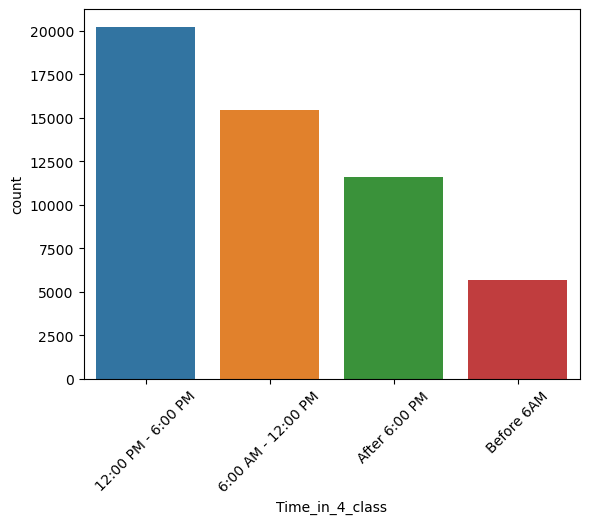

In [49]:
sns.countplot(x='Time_in_4_class', data=filtered_data)
plt.xticks(rotation=45)
plt.show()

In [50]:
pd.crosstab(filtered_data['Time_in_4_class'], filtered_data['Which_month'])

Which_month,1,2,3,4,5,6,7,8,9,10,11,12
Time_in_4_class,,,,,,,,,,,,
12:00 PM - 6:00 PM,1573,1521,1766,1612,2001,1983,1833,1755,1629,1712,1500,1358
6:00 AM - 12:00 PM,1447,1296,1431,1245,1421,1371,1222,1184,1200,1323,1233,1098
After 6:00 PM,849,877,958,857,1033,1121,1128,1023,947,986,883,921
Before 6AM,462,486,478,454,470,541,571,524,407,429,451,418


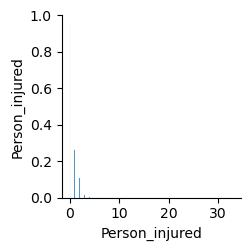

In [51]:

# Create the pairplot
sns.pairplot(filtered_data)
plt.show()


Below barchart shows number of crashes in respective months

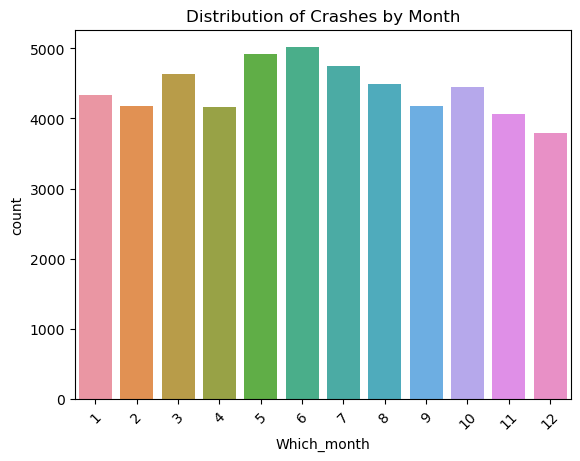

In [87]:
#Bar plot for a categorical variable
sns.countplot(data=filtered_data, x='Which_month')
plt.title("Distribution of Crashes by Month")
plt.xticks(rotation=45)
plt.show()

Box plot for number of casualties 

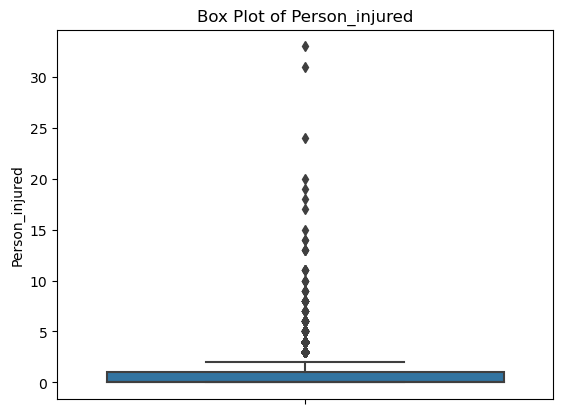

In [54]:
sns.boxplot(data=filtered_data, y='Person_injured')
plt.title("Box Plot of Person_injured")
plt.show()

Below bar charts shows the relationship between  vehicle types and reasons for crash 

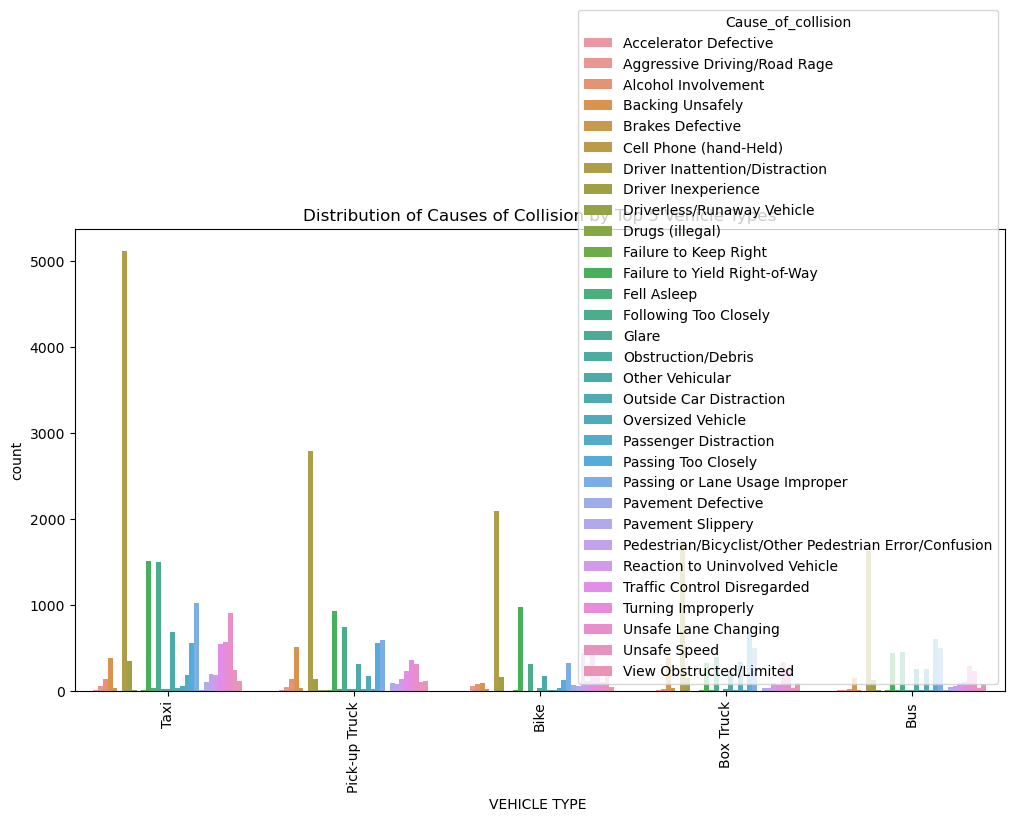

In [55]:
top_5_vehicle_types = filtered_data['VEHICLE TYPE '].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 vehicle types
filtered_data_top_5 = filtered_data[filtered_data['VEHICLE TYPE '].isin(top_5_vehicle_types)]
# Get the top 10 most frequent causes of collision
top_10_causes = filtered_data['Cause_of_collision'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 causes of collision
filtered_data_top_10_causes = filtered_data[filtered_data['Cause_of_collision'].isin(top_10_causes)]


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data_top_5, x='VEHICLE TYPE ', hue='Cause_of_collision', order=top_5_vehicle_types)
plt.title("Distribution of Causes of Collision by Top 5 Vehicle Types")
plt.xticks(rotation=90)
plt.show()


below graph shows the vehicle crashes in respective counties 

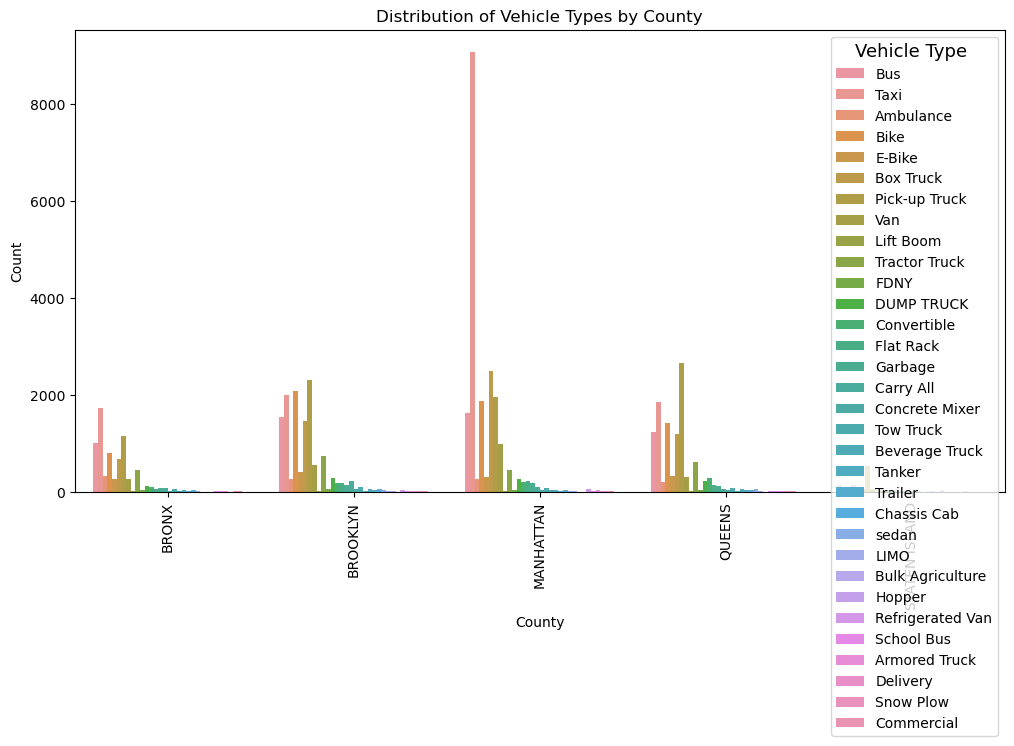

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x="COUNTY", hue="VEHICLE TYPE ")
plt.title("Distribution of Vehicle Types by County")
plt.xlabel("County")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Vehicle Type ", title_fontsize='13', loc="upper right")
plt.show()

Table that describes how many crashes occur in concerned timeframe and respective day of week

In [57]:
# Pivot the data to create a pivot table 
pivot_table = filtered_data.pivot_table(index='Time_in_4_class', columns='Which_day', values='COUNTY', aggfunc='count')
pivot_table.head()


Which_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Time_in_4_class,,,,,,,
12:00 PM - 6:00 PM,3522,3119,2002,1499,3433,3310,3358
6:00 AM - 12:00 PM,2643,2678,1110,728,2740,2880,2692
After 6:00 PM,1986,1457,1635,1278,1829,1642,1756
Before 6AM,889,687,1114,1072,735,583,611


Heat map to identify maximum risk timeframe 

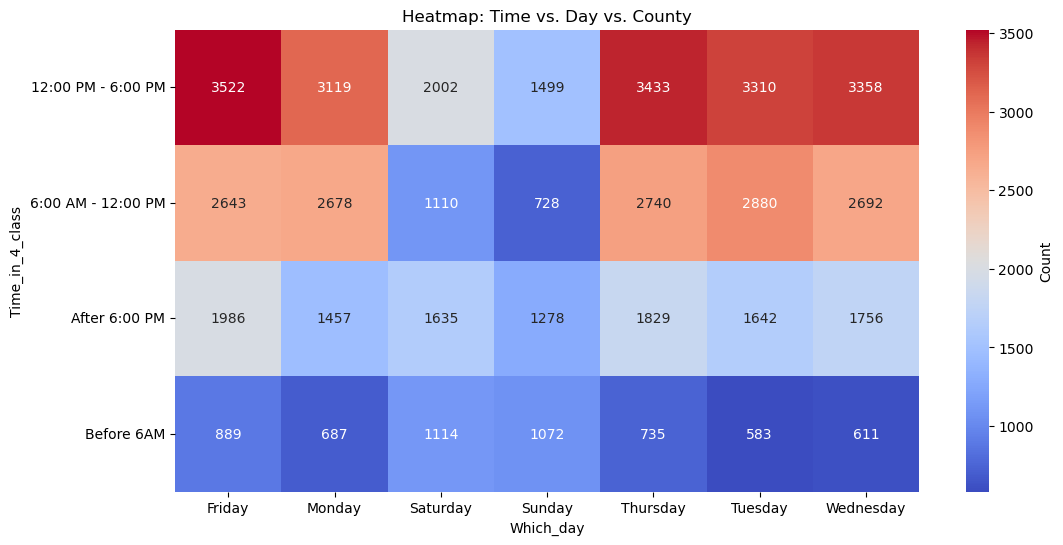

In [59]:

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Heatmap: Time vs. Day vs. County')
plt.xlabel('Which_day')
plt.ylabel('Time_in_4_class')
plt.show()

Models

Below we are building a model to predict the number of casualties. 

In [94]:
#Ours is a regression problem where we are performing prediction hence using Random Forest Regressor (Regression)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#below function we are using to convert variables to categorical variables
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in filtered_data:
    if filtered_data[i].dtype == 'object':
        lblE.fit(filtered_data[i])
        filtered_data[i] = lblE.transform(filtered_data[i])

filtered_data = pd.get_dummies(filtered_data)        

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data.drop('Person_injured', axis=1), 
                                                    filtered_data.Person_injured, test_size=0.33, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

#below function is added to check RMSE , R2 ,R coefficents
def rmse(x,y): return np.sqrt(((x-y)**2).mean())
# Calculate RMSE and R2 for training and test data
def print_score(model):
    rmse_train = rmse(model.predict(X_train), y_train)
    rmse_test = rmse(model.predict(X_test), y_test)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    if hasattr(model, 'oob_score_'):res.append(model.oob_score_)
    
  # Create a list with the results
    results = [rmse_train, rmse_test, r2_train, r2_test]
    
    # If the model has an out-of-bag score, add it to the results
    if hasattr(model, 'oob_score_'):
        results.append(model.oob_score_)
    
    # Print the results
    print("The RMSE for the training data set:", results[0])
    print("The RMSE for the prediction data set:", results[1])
    print("The R2 for data set:", results[2])
    print("The R coefficient for  data set:", results[3])

#Train our model and then print the RMSE , R2 values :
model.fit(X_train, y_train)
print_score(model)


The RMSE for the training data set: 0.3068739611512106
The RMSE for the prediction data set: 0.8373116985065548
The R2 for data set: 0.8619527020883075
The R coefficient for  data set: 0.06115577760487767


,importance
features,
street_name,0.306358
VEHICLE TYPE,0.137222
Which_month,0.135169
Cause_of_collision,0.106185
Which_day,0.104114


In [95]:

#below we are checking important features :
f_imp = pd.DataFrame(data={'importance':model.feature_importances_,'features':X_train.columns}).set_index('features')
f_imp = f_imp.sort_values('importance', ascending=False)
f_imp.head(5)



,importance
features,
street_name,0.306358
VEHICLE TYPE,0.137222
Which_month,0.135169
Cause_of_collision,0.106185
Which_day,0.104114


In [2]:
# Create a DataFrame with feature importances to make a sample prediction for number of fatalities given the features

# Sample new data with the some features
new_data = pd.DataFrame({
   
    'Time_in_4_class': [2],
    'Which_month': [3],
    'Which_year': [2022],
    'Which_day': [2],
    'Cause_of_collision': [29],
    'VEHICLE TYPE ': [3],
     'COUNTY': [3],
     'street_name': [5024]

})

# below we are making prediction : 
predictions = model.predict(new_data)
rounded_predictions = [int(round(pred)) for pred in predictions]

print("Number of probable casualities based on above features: ")
print(rounded_predictions)



NameError: name 'pd' is not defined

In [90]:
 # Below we are checking gradient booster regression models to see if we get better RMSE :  

from sklearn.ensemble import GradientBoostingRegressor
m = GradientBoostingRegressor(n_estimators=50)
m.fit(X_train, y_train)
print_score(m)

The RMSE for the training data set: 0.7660017129589806
The RMSE for the prediction data set: 0.8092036670061176
The R2 for the training data set: 0.13986362668737817
The R2 for the prediction data set: 0.12313062121573282


In [91]:
 # Below we are checking decision tree regression models to see if we get better RMSE :  


from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor()
m.fit(X_train, y_train)
print_score(m)

The RMSE for the training data set: 0.029310931897704433
The RMSE for the prediction data set: 1.1316460349099133
The R2 for the training data set: 0.9987405901530079
The R2 for the prediction data set: -0.7149064434456702


Above shows the randomeforest regressor has the best RMSE and R2 values hence we have chosen random forest regressor for building our regression model - 